In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential 




import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

tf.__version__

'2.15.0'

In [2]:
df = pd.read_csv('data/Cleaned/Cleaned_videoData.csv')
df.head()

,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,...,ratings_disabled,description,cleaned_title,cleaned_title_ns,start_year,start_month,start_day,trend_year,trend_month,trend_day
0,I ASKED HER TO BE MY GIRLFRIEND...,8/11/2020,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,8/12/2020,"['brawadis', 'prank', 'basketball', 'skits', '...",1514614.0,156908.0,5855.0,...,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,I ASKED HER TO BE MY GIRLFRIEND,ASKED GIRLFRIEND,2020.0,8.0,11.0,2020.0,8.0,12.0
1,Road Rage – Why Motorcycle Riders Smash Windows,8/9/2020,UCNSMdQtn1SuFzCZjfK2C7dQ,FortNine,Autos & Vehicles,8/12/2020,"['motorcycle road rage compilation', 'motorcyc...",342870.0,30254.0,580.0,...,False,As the generation that grew up playing Road Ra...,Road Rage Why Motorcycle Riders Smash Windows,Road Rage Motorcycle Riders Smash Windows,2020.0,8.0,9.0,2020.0,8.0,12.0
2,"Whatever You Build, I'll Pay For!",8/6/2020,UCIPPMRA040LQr5QPyJEbmXA,MrBeast Gaming,Gaming,8/12/2020,['[none]'],13073796.0,1643982.0,16286.0,...,False,We have a giant area of land and whatever you ...,Whatever You Build I ll Pay For,Whatever Build Pay,2020.0,8.0,6.0,2020.0,8.0,12.0
3,"Trump signs executive orders on unemployment, ...",8/8/2020,UCHd62-u_v4DvJ8TCFtpi4GA,Washington Post,News & Politics,8/12/2020,"['debt', 'student loans', 'unemployment aid', ...",523172.0,6045.0,1076.0,...,False,After negotiations with Democrats in Congress ...,Trump signs executive orders on unemployment e...,Trump signs executive orders unemployment evic...,2020.0,8.0,8.0,2020.0,8.0,12.0
4,UPDATE: CLAN WARS 2 ⚔️ How does it work? TV Ro...,8/8/2020,UC_F8DoJf9MZogEOU51TpTbQ,Clash Royale,Gaming,8/12/2020,"['clash royale', 'clash royale game', 'superce...",2635254.0,73921.0,2694.0,...,False,Clan Wars 2 is coming. Get ahead of the compet...,UPDATE CLAN WARS How does it work TV Royale Cl...,UPDATE CLAN WARS work TV Royale Clash Royale News,2020.0,8.0,8.0,2020.0,8.0,12.0


In [3]:
df.columns

Index(['title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'description',
       'cleaned_title', 'cleaned_title_ns', 'start_year', 'start_month',
       'start_day', 'trend_year', 'trend_month', 'trend_day'],
      dtype='object')

In [4]:
cols = [ 'view_count', 'likes', 'dislikes', 'comment_count']

In [5]:
data = df[cols].copy()

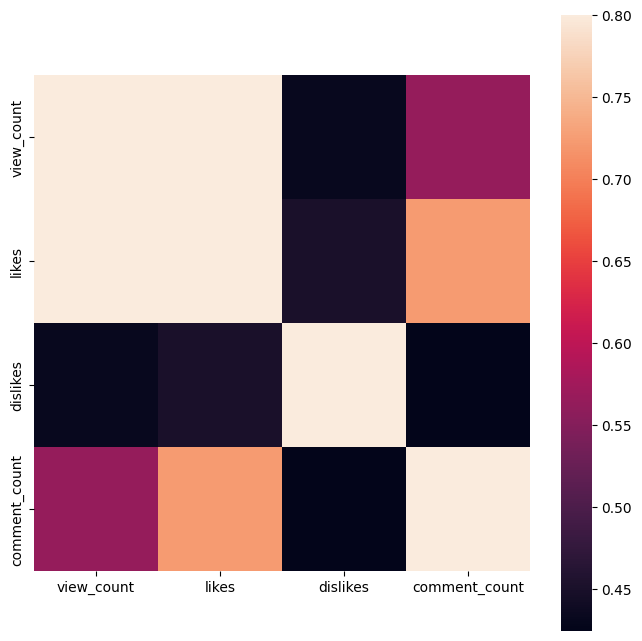

In [6]:
C_mat = data.corr()
fig = plt.figure(figsize = (8,8))
sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [7]:
data.dropna(inplace = True, axis = 0)

In [8]:
# Scaling the variables
## Normalizing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)


X = data_scaled_df.drop('view_count', axis = 1)
y = data_scaled_df[['view_count']]
X.head()

,likes,dislikes,comment_count
0,0.065305,0.515462,0.318688
1,-0.235607,-0.087504,-0.095494
2,3.598383,1.707792,1.122064
3,-0.293124,-0.030808,-0.069953
4,-0.131861,0.154140,-0.091338


In [22]:
y.head()

,view_count
0,-0.137582
1,-0.288889
2,1.355056
3,-0.265607
4,0.007126


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Creating a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu', input_shape = (X_train.shape[1], )),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),

    tf.keras.layers.Dense(1, activation = 'linear')
])

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
4532/4532 [==============================] - 10s 2ms/step - loss: 0.1610 - mse: 0.1610 - mae: 0.1431 - val_loss: 0.1528 - val_mse: 0.1528 - val_mae: 0.1417
Epoch 2/50
4532/4532 [==============================] - 10s 2ms/step - loss: 0.1595 - mse: 0.1595 - mae: 0.1428 - val_loss: 0.1489 - val_mse: 0.1489 - val_mae: 0.1348
Epoch 3/50
4532/4532 [==============================] - 10s 2ms/step - loss: 0.1567 - mse: 0.1567 - mae: 0.1420 - val_loss: 0.1877 - val_mse: 0.1877 - val_mae: 0.1495
Epoch 4/50
4532/4532 [==============================] - 10s 2ms/step - loss: 0.1593 - mse: 0.1593 - mae: 0.1419 - val_loss: 0.1579 - val_mse: 0.1579 - val_mae: 0.1476
Epoch 5/50
4532/4532 [==============================] - 10s 2ms/step - loss: 0.1575 - mse: 0.1575 - mae: 0.1419 - val_loss: 0.1545 - val_mse: 0.1545 - val_mae: 0.1372
Epoch 6/50
4532/4532 [==============================] - 9s 2ms/step - loss: 0.1516 - mse: 0.1516 - mae: 0.1412 - val_loss: 0.1488 - val_mse: 0.1488 - val_mae: 0.1359

In [17]:
loss, mse, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

1417/1417 [==============================] - 2s 1ms/step - loss: 0.1316 - mse: 0.1316 - mae: 0.1358
Mean Absolute Error on Test Set: 0.13577592372894287


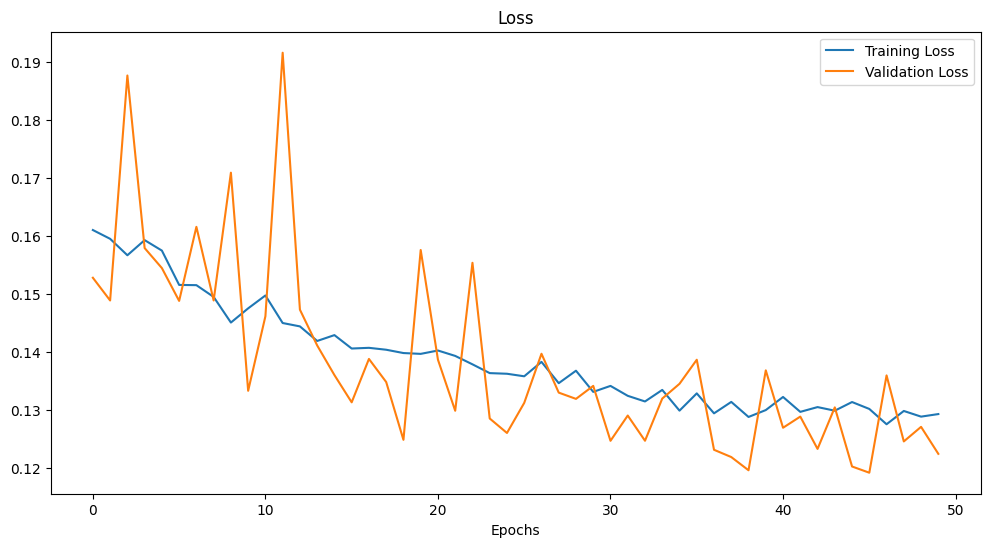

<Figure size 640x480 with 0 Axes>

In [18]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Plot Loss

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.tight_layout()


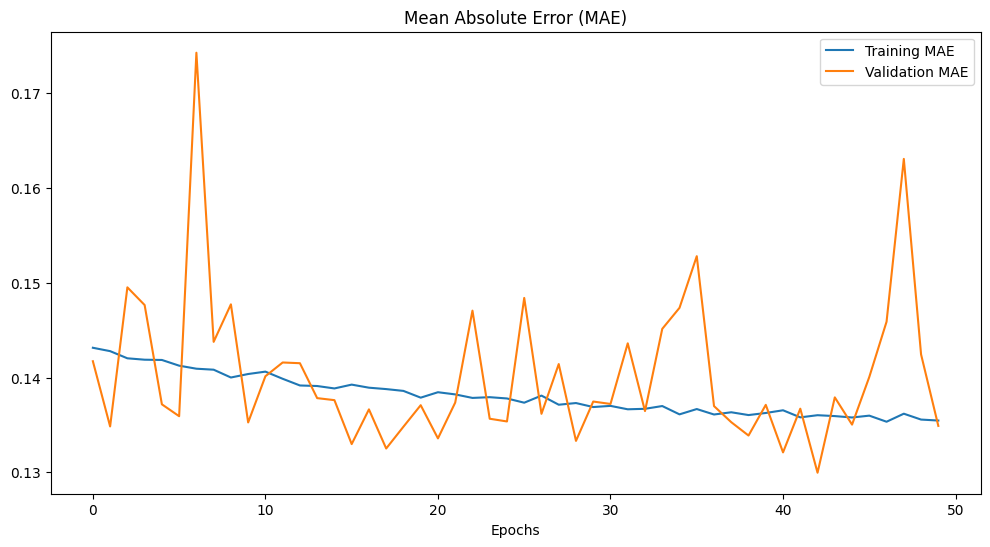

In [19]:
# Plot MSE
plt.figure(figsize=(12, 6))

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.legend()
plt.show()



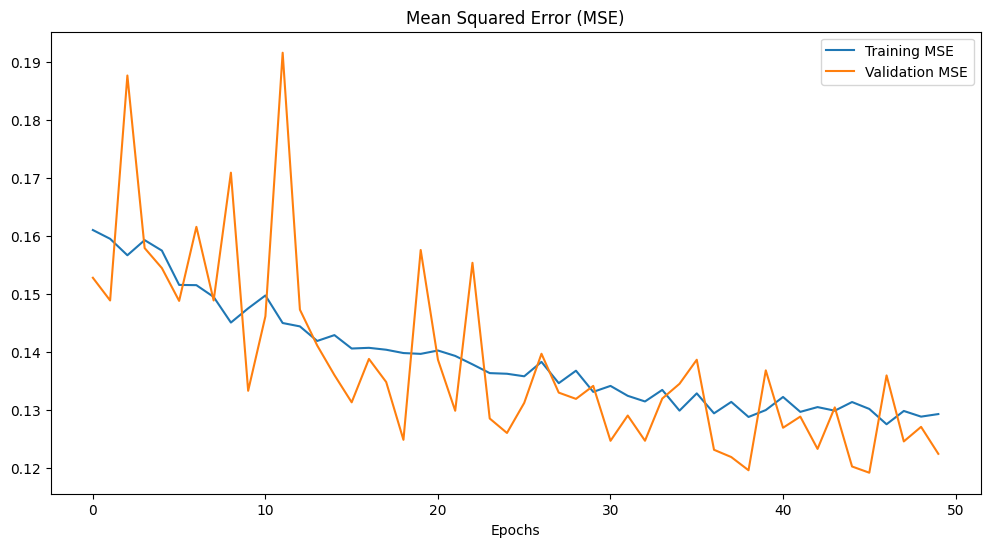

In [20]:
# Plot MAE
plt.figure(figsize=(12, 6))

plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epochs')
plt.legend()
plt.show()



In [21]:
print(history.history)

{'loss': [0.1610468477010727, 0.15953153371810913, 0.15669377148151398, 0.1593051701784134, 0.15749859809875488, 0.15157663822174072, 0.15153509378433228, 0.1495039165019989, 0.14508360624313354, 0.1475319117307663, 0.14975646138191223, 0.14500238001346588, 0.14442048966884613, 0.14190621674060822, 0.14291653037071228, 0.14060252904891968, 0.14072218537330627, 0.1403929591178894, 0.13982155919075012, 0.13967938721179962, 0.14025914669036865, 0.13932746648788452, 0.13787448406219482, 0.1363597810268402, 0.1362486034631729, 0.13581041991710663, 0.13829737901687622, 0.1346239149570465, 0.13677330315113068, 0.1331232637166977, 0.13415324687957764, 0.13244053721427917, 0.13146743178367615, 0.13346005976200104, 0.12988440692424774, 0.132862851023674, 0.12941911816596985, 0.13139164447784424, 0.12879319489002228, 0.12998200953006744, 0.1322437971830368, 0.12967322766780853, 0.13049660623073578, 0.1298748105764389, 0.13136884570121765, 0.13017773628234863, 0.127535879611969, 0.1298284232616424